In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Агрохимия объединение

In [8]:
pp_points = ['525','526','527',"528", '586']

df = pd.read_excel('агрохимия 2021.xlsx')
df = df.iloc[:72]
df['GPS №'] = df['Маркировка закзчика'].str.split(' ', expand=True)[1]
df["Глубина"] = df['Маркировка закзчика'].str.split(' ', expand=True)[2]
df['повторность'] = df['Маркировка закзчика'].str.split(' ', expand=True)[3]
df['повторность'][df['повторность'].isnull()] = '[0]'
df['Тип обработки'] = 'ТТ'
df['Тип обработки'][df['GPS №'].isin(pp_points)] = 'ПП'
df['Год'] = 2021
df = df.drop(["№ п.п.", "Код образца","Маркировка закзчика" ], axis = 1)
columns_order = ['Год','GPS №','Тип обработки', 'Глубина', 'повторность','рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН',
       'Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1','Общий азот, %', 'Общий углерод, %', 'М.д. содержания  гипса (по Хитрову), %',
       'Массовая доля иона хлорида, ммоль/100 г',
       'Массовая доля иона сульфата, ммоль/100 г',
       'Массовая доля магния (водорастворимая форма), ммоль/100 г почвы',
       'Массовая доля кальция (водорастворимая форма), ммоль/100 г почвы',
       'Массовая доля натрия (водорастворимая форма), мг•экв на 100 г почвы',
       'Массовая доля калия (водорастворимая форма), мг•экв на 100 г почвы',
       'Сумма поглощенных оснований по Каппену, ммоль/100 г',
       'Массовая доля плотного остатка водной вытяжки, %',
       'Карбонат и бикарбонат-ионы, ммоль/100 г',
       'Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)',
       'Массовая доля общего содержания карбонатов (по Козловскому), %(CaCO3)']
df = df.reindex(columns = columns_order)
df.head(3)
df.to_csv('ready_data/агрохимия.csv', index = False)

del df

agrochem = pd.read_csv('ready_data/агрохимия.csv')
agrochem.head(3)
agrochem.columns

df = pd.read_excel('агрохимия 2020.xls')
df['Год'] = 2021 

df['GPS №'] = df['Маркировка образца'].str.split(' ', expand=True)[1]
df['GPS №'] = df['GPS №'].astype(int) + 300
df['GPS №'].astype(str)
df['GPS №'] = df['GPS №'].astype(str)


df["Глубина"] = df['Маркировка образца'].str.split(' ', expand=True)[3]
df['повторность'] = df['Маркировка образца'].str.split(' ', expand=True)[2]
df['повторность'] = df['повторность'].astype(int) - 1
df['повторность'] = '[' + df['повторность'].astype(str) + ']'

df['Тип обработки'] = 'ТТ'
df['Тип обработки'][df['GPS №'].isin(pp_points)] = 'ПП'
df['Год'] = 2020

df = df.drop(["Unnamed: 0",'Маркировка образца', 'Код образца'], axis = 1)
df = df.reindex(columns = columns_order)

agrochem = agrochem.append(df)

agrochem = agrochem.drop_duplicates()
agrochem.to_csv('ready_data/агрохимия.csv', index = False)

del df
del agrochem

agrochem = pd.read_csv('ready_data/агрохимия.csv')

df = pd.read_excel('агрохимия 2019.xlsx')

df['Год'] = 2019 
df['GPS №'] = df['Номер_образца_по_пакету_'].str.split('-', expand=True)[1]
df["Глубина"] = df['глубина']
df['Тип обработки'] = df["тип_обработки"]
df = df.reindex(columns = columns_order)

agrochem = agrochem.append(df)

agrochem = agrochem.drop_duplicates()

С_ = (agrochem["Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)"].astype(float) * 12)/44 # не органический углеро
C_org = agrochem['Общий углерод, %'] - С_
agrochem['Органический углерод, %'] = C_org

agrochem.to_csv('ready_data/агрохимия.csv', index = False)

del df
del agrochem

agrochem = pd.read_csv('ready_data/агрохимия.csv')



Физика

In [9]:
df = pd.read_excel("Сухое просеивание архан 2019.xlsx")
df['Тип обработки'] = df['повторность'].str.split(' ', expand=True)[1]
df['Год'] = df['повторность'].str.split(' ', expand=True)[2] 
df['повторность'] = df['повторность'].str.split(' ', expand=True)[4]
df['повторность'] = df['повторность'].astype(int) - 1
df['повторность'] = '[' + df['повторность'].astype(str) + ']'

df.to_csv('ready_data/сухое просеивание.csv', index = False)

del df
suh = pd.read_csv('ready_data/сухое просеивание.csv')
df = pd.read_excel("Сухое просеивание архан 2020(по ключевым участкам).xlsx")
df['Тип обработки'] = 'ТТ'
df['Тип обработки'][df['GPS'].astype(str).isin(pp_points)] = 'ПП'
df['Год'] = 2020


suh = suh.append(df)

del df

suh['размер_агрегатов'] = suh['размер_агрегатов'].str.replace('мм', '')
suh.columns = ['Размер агрегатов, мм', "Вес, г", 'Поврторность', "Тип обработки", "Год",'GPS №' ]
suh.to_csv('ready_data/сухое просеивание.csv', index = False)

suh = pd.read_csv('ready_data/сухое просеивание.csv')





мокрое просеивание 

In [10]:
df = pd.read_excel('мокрое просеивание архангельское 2019.xlsx')
df['Тип обработки'] = df['Варианты опыта'].str.split(' ', expand=True)[2]
df['повторность'] = df['Варианты опыта'].str.split(' ', expand=True)[3] 
df['Год'] = df['Варианты опыта'].str.split(' ', expand=True)[1] 

df['повторность'] = df['Варианты опыта'].str.split(' ', expand=True)[4]
df['повторность'] = df['повторность'].astype(int) - 1
df['повторность'] = '[' + df['повторность'].astype(str) + ']'
df = df.drop("Варианты опыта", axis = 1)
mokroe = df.copy()

df = pd.read_excel('мокрое просеивание архангельское 2020(и другие объекты).xlsx')
df['Год'] = "2020"
df['GPS №'] = df['Варианты опыта'].str.split(' ', expand=True)[3]
GPS_dict = {"1": "529" ,"2": "528" ,"3": "525","4": "527","5": "526"}
df["GPS №"] = df["GPS №"].replace(GPS_dict)
df['Тип обработки'] = 'ТТ'
df['Тип обработки'][df['GPS №'].isin(pp_points)] = 'ПП'
df = df.drop("Варианты опыта", axis = 1	)
mokroe = mokroe.append(df)
mokroe['Вес образца, г'] = mokroe["вес чашки+просеянная фракция агрегатов"] - mokroe["вес пустой чашки в которую просеивали"]
mokroe = mokroe.drop(["Масса образца", "вес пустой чашки в которую просеивали","вес чашки+просеянная фракция агрегатов" ], axis = 1)
mokroe = mokroe.reindex(columns = ['Год', "Тип обработки","GPS №", "повторность",  "Размер сухого агрегата", "Размеры фракций", 'Вес образца, г'])

mokroe["Размер сухого агрегата"] = mokroe["Размер сухого агрегата"].str.replace('мм', '')
mokroe["Размер сухого агрегата"] = mokroe["Размер сухого агрегата"].str.replace(' ', '')

mokroe["Размеры фракций"] = mokroe["Размеры фракций"].str.replace('мм', '')
mokroe["Размеры фракций"] = mokroe["Размеры фракций"].str.replace(' ', '')

sum_1 = mokroe[mokroe["Год"] == "2019"].groupby(["Год","Тип обработки",  "повторность", "Размер сухого агрегата"	]).sum().reset_index()
sum_2 = mokroe[mokroe["Год"] == "2020"].groupby(["Год","Тип обработки",  "GPS №", "Размер сухого агрегата"	]).sum().reset_index()
sumary_w = sum_1.append(sum_2)
sumary_w['потери'] = 20 - sumary_w["Вес образца, г"]
sumary_w["Размеры фракций"] = "<0.25"
sumary_w = sumary_w.drop(['Вес образца, г'], axis = 1)


merged = pd.merge(sumary_w,mokroe,how = 'outer' , on = ['Год',"Тип обработки",'повторность', "GPS №", 'Размер сухого агрегата', 'Размеры фракций'] )
merged["потери"] = merged["потери"].fillna(0)
merged['Вес образца, г'] = merged["потери"] + merged['Вес образца, г']

mokroe = merged.copy()

mokroe = mokroe.drop("потери", axis = 1)
mokroe.to_csv('ready_data/мокрое просеивание.csv', index = False)

del sumary_w, sum_1, sum_2, merged, mokroe


In [11]:
gran_sostav = pd.read_excel("гран состав.xlsx")
gran_sostav['GPS №'] = gran_sostav["Маркировка заказчика"].str.split(' ', expand = True)[1]
gran_sostav = gran_sostav.drop(['Номер по порядку', 'Код образца ', 'Маркировка заказчика'], axis = 1)
gran_sostav.to_csv('ready_data/гранулометрический состав.csv', index = False)


In [12]:
ob_ves = pd.read_excel("ведомость объемный вес Ставрополь.xlsx")
ob_ves['GPS №'] = ob_ves["Точка GPS"]
ob_ves = ob_ves.drop(['Точка GPS', 'Вес'], axis = 1)
ob_ves.to_csv('ready_data/объемный вес.csv', index = False)

del ob_ves

In [13]:
pd.read_csv('ready_data/объемный вес.csv')

,повторность,Объемный вес,GPS №
0,4,1.079381,526
1,3,1.045722,526
2,1,1.076029,526
3,2,1.022189,526
4,4,0.991603,525
5,3,1.051029,525
6,1,0.986016,525
7,2,0.967581,525
8,3,1.091880,527
9,2,1.167298,527


Расчет агрофизических параметров 
по сухому просеиванию - 
- Содержание глыб > 10мм 
- Сумма агрономически - ценных агрегатов 
- СВД мм 
- К.структурности 

Средневзвешенный диаметр - svd = SUM((вес фракции/суммарный вес образца * средний размер агрегата)
по мокрому просеиванию 
- водопрочные агрономически ценные агрегаты
- критерий водопрочности А(АФИ) = (Свп/С) * 100
где А - критерий водопрочности - С - содержание структурных агрегатов от 1 - 0.25 при сухом С вп - те же агрегаты при мокром 
- СВД по фракциям >10 , 10-7 , 7-5, 5-3



на основании гранн состава - коэф Рс (вадюнина)

Рс = (а + b/с)·100, %,
где а – количество ила в % (частицы
диаметром < 0,001 мм); b – количество
мелкой пыли в % (частицы диаметром
0,005 мм – 0,001 мм); с – суммарное
содержание крупной и средней пыли
(частицы диаметром 0,05–0,01 мм и 0,01–
0,005 мм)

надо трансформировать голые данные по сухому и мокрому просеиванию в готовые к расчетам и визуализации данным 

In [14]:
agr_suhoe = pd.read_csv('ready_data/сухое просеивание.csv')
agr_suhoe['GPS №'] = agr_suhoe['GPS №'].astype(str)
GPS = agr_suhoe['GPS №'].unique()[1:]
povt = ["[{}]".format(i) for i in range(5,10)]
for j in range(len(GPS)):
    agr_suhoe["Поврторность"][agr_suhoe['GPS №'] == GPS[j]] = povt[j]

summa = agr_suhoe[["Размер агрегатов, мм","Вес, г",'Тип обработки', "Поврторность", ]].groupby(['Тип обработки','Поврторность']).sum().reset_index()
summa.columns = ['Тип обработки','Поврторность','сумма агрегатов']
agr_suhoe_2019 = pd.merge(agr_suhoe,summa, on =['Тип обработки','Поврторность'] )

#пересчет агрегатов в процентное содержание
agr_suhoe['Содержание агрегатов'] = agr_suhoe["Вес, г"]/agr_suhoe_2019['сумма агрегатов']



suhoe_features = agr_suhoe[~agr_suhoe["Размер агрегатов, мм"].isin(['>10', '<0.25'])].groupby(['Тип обработки','Поврторность']).sum().reset_index()

good = agr_suhoe[~agr_suhoe["Размер агрегатов, мм"].isin(['>10', '<0.25'])].groupby(['Тип обработки','Поврторность']).sum().reset_index()["Вес, г"]
bad = agr_suhoe[agr_suhoe["Размер агрегатов, мм"].isin(['>10', '<0.25'])].groupby(['Тип обработки','Поврторность']).sum().reset_index()["Вес, г"]
glib = agr_suhoe[agr_suhoe["Размер агрегатов, мм"].isin(['>10'])].groupby(['Тип обработки','Поврторность']).sum().reset_index()["Содержание агрегатов"]
small = agr_suhoe[agr_suhoe["Размер агрегатов, мм"].isin(['<0.25'])].groupby(['Тип обработки','Поврторность']).sum().reset_index()["Содержание агрегатов"]


#свд 
agr_suhoe['size'] = agr_suhoe["Размер агрегатов, мм"]
agr_suhoe['size'] = agr_suhoe['size'].str.replace('>','16-')
agr_suhoe['size'] = agr_suhoe['size'].str.replace('<0.25','0.25-0')
agr_suhoe[['bottom' , 'top']] = agr_suhoe['size'].str.split("-", expand = True)
agr_suhoe[['bottom' , 'top']] = agr_suhoe[['bottom' , 'top']].astype(float)

agr_suhoe['size'] = (agr_suhoe['top'] + agr_suhoe['bottom']) / 2 
agr_suhoe['СВД, мм'] = agr_suhoe["Содержание агрегатов"] * agr_suhoe['size']
SVD = agr_suhoe.groupby(['Тип обработки','Поврторность']).sum().reset_index()["СВД, мм"]

#коэф структурности
KS = good/bad


suhoe_features['Содержание 0,25–10 мм, %'] = suhoe_features["Содержание агрегатов"]
suhoe_features['Содержание >10, %'] = glib
suhoe_features['Содержание <0.25, %'] = small
suhoe_features['Коэф. структурности Кс'] = KS
suhoe_features['СВД, мм'] = SVD

suhoe_features["GPS №"] = suhoe_features['Поврторность']

gps_dict = dict(zip(povt, GPS))

suhoe_features["GPS №"] = suhoe_features["GPS №"].replace(gps_dict)
suhoe_features["GPS №"][~suhoe_features["GPS №"].isin(GPS)] = np.nan
suhoe_features["Поврторность"][suhoe_features["GPS №"].isin(GPS)] = np.nan
suhoe_features["Год"][~suhoe_features["GPS №"].isin(GPS)] = 2019
suhoe_features["Год"][suhoe_features["GPS №"].isin(GPS)] = 2020

suhoe_features = suhoe_features[[
    'Год',
    'GPS №',
    'Тип обработки',
    'Поврторность',
    "Содержание 0,25–10 мм, %",
    "Содержание >10, %",
    "Содержание <0.25, %",
    "Коэф. структурности Кс",
    "СВД, мм"
     ]]

suhoe_features.columns = [
    'Год',
    'GPS №',
    'Тип обработки',
    'повторность',
    "Содержание 0.25–10 мм, %",
    "Содержание >10, %",
    "Содержание <0.25, %",
    "Коэф. структурности",
    "СВД, мм"
     ]
suhoe_features.to_csv('ready_data/агрофизика.csv', index = False)


del suhoe_features


In [74]:
fiz_features = pd.read_csv('ready_data/агрофизика.csv')

In [75]:
mokroe = pd.read_csv('ready_data/мокрое просеивание.csv')
mokroe.head(5)
mokroe['GPS №'] = mokroe['GPS №'].astype(str)
#GPS = mokroe['GPS №'].unique()[1:]
#povt  = mokroe['повторность'].unique()[:-1]

povt = ["[{}]".format(i) for i in range(5,10)]
for j in range(len(GPS)):
    mokroe["повторность"][mokroe['GPS №'] == GPS[j]] = povt[j]

mok = (mokroe[mokroe['Размеры фракций'] == '1-0.25'].groupby(['Тип обработки','повторность'])).sum().reset_index()["Вес образца, г"]/100
suh = agr_suhoe[agr_suhoe['Размер агрегатов, мм'].isin(['1-0.5', "0.5-0.25"])].groupby(['Тип обработки','Поврторность']).sum().reset_index()["Содержание агрегатов"]

#коэф АФИ
AFI = mok/suh
fiz_features['Коэф. АФИ'] = AFI * 100
#содержание агрономически ценных , водоустойчивых
fiz_features['Содержание 0.25–10 мм(водоустойчивые), % '] = mokroe[~mokroe["Размеры фракций"].isin(['>10', '<0.25'])].groupby(['Тип обработки','повторность']).sum().reset_index()["Вес образца, г"]/80


#СВД по сухим агрегатам
mokroe['size'] = mokroe["Размеры фракций"]
mokroe['size'] = mokroe['size'].str.replace('>10','16-10')
mokroe['size'] = mokroe['size'].str.replace('>7','10-7')
mokroe['size'] = mokroe['size'].str.replace('>5','5-4')
mokroe['size'] = mokroe['size'].str.replace('>3','4-3')
mokroe['size'] = mokroe['size'].str.replace('<0.25','0.25-0')
mokroe[['bottom' , 'top']] = mokroe['size'].str.split("-", expand = True)
mokroe[['bottom' , 'top']] = mokroe[['bottom' , 'top']].astype(float)

mokroe['size'] = (mokroe['top'] + mokroe['bottom']) / 2 
mokroe['СВД, мм'] = (mokroe["Вес образца, г"]/20) * mokroe['size']

for size in mokroe["Размер сухого агрегата"].unique():
    fiz_features["СВД водоустойчивые {}, мм".format(size)] = mokroe[mokroe["Размер сухого агрегата"] == size].groupby(['Тип обработки','повторность']).sum().reset_index()["СВД, мм"]

# Кву коэф водоустойчивости 

Kvu = (mokroe[["Тип обработки","повторность","Размер сухого агрегата","Вес образца, г" ]][mokroe['Размеры фракций'] != '<0.25'].groupby(['Тип обработки','повторность', 'Размер сухого агрегата'])).sum() /20 * 100
Kvu = Kvu.reset_index()

for size in Kvu["Размер сухого агрегата"].unique():
    fiz_features["Кву {}, мм".format(size)] =  Kvu[Kvu["Размер сухого агрегата"] == size].reset_index()["Вес образца, г"]


fiz_features.to_csv('ready_data/агрофизика.csv', index = False)

del fiz_features

In [76]:
pd.read_csv('ready_data/агрофизика.csv')

,Год,GPS №,Тип обработки,повторность,"Содержание 0.25–10 мм, %","Содержание >10, %","Содержание <0.25, %",Коэф. структурности,"СВД, мм",Коэф. АФИ,"Содержание 0.25–10 мм(водоустойчивые), %","СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм","Кву 10-7, мм","Кву 5-3, мм","Кву 7-5, мм","Кву >10, мм"
0,2019,NaN,ПП,[0],0.382260,0.567087,0.050653,0.618805,8.945267,487.458693,0.700250,3.309188,1.482250,2.042812,5.824938,77.35,77.35,74.95,82.35
1,2019,NaN,ПП,[1],0.421429,0.554082,0.024490,0.728395,9.006803,401.054348,0.723375,4.639188,1.652625,1.927875,4.220562,80.45,75.00,70.50,78.60
2,2019,NaN,ПП,[2],0.421638,0.537419,0.040944,0.729020,8.759355,508.600930,0.668625,2.709750,1.197062,2.330312,6.496625,73.45,74.50,77.30,83.30
3,2019,NaN,ПП,[3],0.329279,0.642243,0.028478,0.490933,9.851676,688.501212,0.735375,3.168250,1.355687,1.871875,4.479063,80.55,83.20,75.50,79.55
4,2019,NaN,ПП,[4],0.410129,0.566369,0.023502,0.695286,8.993835,341.020859,0.779875,2.935500,1.428563,2.346250,3.505313,81.15,69.55,83.10,84.50
5,2020,528.0,ПП,NaN,0.429298,0.554707,0.015994,0.752229,8.887768,477.822500,0.524625,2.680563,0.678875,2.556625,5.343813,58.55,49.65,68.65,69.40
6,2020,525.0,ПП,NaN,0.328168,0.645397,0.026436,0.488467,9.715930,476.509375,0.577625,4.674562,1.295812,2.069437,5.657250,70.45,56.30,64.95,74.60
7,2020,527.0,ПП,NaN,0.367634,0.598160,0.034205,0.581364,9.269797,666.024775,0.621625,2.966750,1.085062,1.520563,4.769625,69.70,66.10,65.85,72.60
8,2020,526.0,ПП,NaN,0.499834,0.479548,0.020619,0.999335,8.525150,672.105135,0.623750,4.612937,1.513625,1.977875,6.937875,76.40,74.05,70.75,75.00
9,2019,NaN,ТТ,[0],0.385279,0.564980,0.049741,0.626754,8.543488,242.935678,0.674000,1.670250,0.990312,1.292250,1.901562,64.75,73.55,65.45,73.15


на основании гранн состава - коэф Рс (вадюнина)

Рс = (а + b/с)·100, %,
где а – количество ила в % (частицы
диаметром < 0,001 мм); b – количество
мелкой пыли в % (частицы диаметром
0,005 мм – 0,001 мм); с – суммарное
содержание крупной и средней пыли
(частицы диаметром 0,05–0,01 мм и 0,01–
0,005 мм)

In [18]:
koef_vaduninoy = pd.read_csv('ready_data/гранулометрический состав.csv' ).iloc[:,:]
koef_vaduninoy.columns

koef_vaduninoy['Тип обработки'] = ''

koef_vaduninoy['GPS №'] = koef_vaduninoy['GPS №'].astype(str)

koef_vaduninoy['Тип обработки'][koef_vaduninoy['GPS №'].isin(pp_points)] = 'ПП'
koef_vaduninoy['Тип обработки'][~koef_vaduninoy['GPS №'].isin(pp_points)] = 'ТТ'


a = koef_vaduninoy['<0,001 мм/г'] 
b = koef_vaduninoy['0,005-0,001   мм/г']
c = (koef_vaduninoy['0,05-0,01           мм/г'] + koef_vaduninoy['0,01-0,005    мм/г']) 
koef_vad = (a +b/c) 

koef_vaduninoy['Рс (коэф. Вадюниной)'] = koef_vad
koef_vaduninoy.to_csv('ready_data/гранулометрический состав.csv', index = False)


In [19]:
pd.read_csv('ready_data/гранулометрический состав.csv')

,гигроскопич. влажность % г.в.,"1,0-0,25 мм/г","0,25-0,05 мм/г","0,05-0,01 мм/г","0,01-0,005 мм/г","0,005-0,001 мм/г","<0,001 мм/г","физический песок % мм >0,01 мм","физическая глина % мм < 0,01мм",GPS №,Тип обработки,Рс (коэф. Вадюниной)
0,5.17,0.59,29.69,31.75,10.50,14.74,12.73,62.03,37.97,525,ПП,13.078876
1,6.60,0.37,27.60,35.35,11.56,13.52,11.60,63.32,36.68,526,ПП,11.888211
2,3.30,0.45,16.08,41.78,14.04,15.91,11.74,58.31,41.69,527,ПП,12.025023
3,3.42,0.30,24.06,36.01,11.90,15.12,12.61,60.37,39.63,528,ПП,12.925592
4,6.16,0.11,7.57,40.15,13.22,17.89,21.06,47.83,52.17,529,ТТ,21.395207
5,3.26,0.08,20.61,33.29,9.06,15.91,21.05,53.98,46.02,584,ТТ,21.425679
6,3.51,0.39,24.02,35.82,9.65,14.23,15.89,60.23,39.77,585,ТТ,16.202954
7,3.55,1.45,9.82,36.30,16.39,18.34,17.72,47.57,52.45,586,ПП,18.068074


In [20]:
мои_данные = pd.read_csv('ready_data/агрохимия_правленная.csv', sep = ';')
мои_данные = мои_данные[ (мои_данные['Глубина'].isin(['0-10',"10-20","20-30"])) & (мои_данные['Год'].isin(["2020", "2021"])) ]
for_research_columns = ['GPS №', 'Тип обработки', 'Глубина','рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН','Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1','Общий азот, %', 'Общий углерод, %','Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)']

мои_данные = мои_данные[for_research_columns]

In [21]:
мои_данные.describe()

,GPS №,"рН солевой вытяжки, ед. рН","рН водной вытяжки, ед. рН","Фосфор (подвижная форма), мг/кг","Калий (подвижная форма), млн-1","Общий азот, %","Общий углерод, %","Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)"
count,120.000000,119.000000,117.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,548.750000,7.237311,8.247521,14.361032,340.858741,0.160833,1.497987,1.229145
std,28.223671,0.145461,0.226186,6.052727,123.138416,0.037475,0.253187,0.655792
min,525.000000,6.690000,7.690000,4.351396,156.910096,0.050000,1.129500,0.330000
25%,526.750000,7.175000,8.130000,9.770115,263.031860,0.150000,1.352025,0.814000
50%,528.500000,7.250000,8.220000,12.233169,318.547096,0.160000,1.470200,1.045000
75%,584.250000,7.335000,8.340000,18.144499,377.087382,0.170000,1.564650,1.435500
max,586.000000,7.530000,8.920000,35.200000,780.738616,0.340000,3.379500,4.928000


In [22]:
мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'].mean()

1.2291452380952372

In [23]:
top = мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'].std() * 2 +  мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'].mean()
bottom =   мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'].mean() - мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'].std() * 3

In [24]:
мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'][мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'] > top] = мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'].median()

In [25]:
мои_данные.columns

Index(['GPS №', 'Тип обработки', 'Глубина', 'рН солевой вытяжки, ед. рН',
       'рН водной вытяжки, ед. рН', 'Фосфор (подвижная форма), мг/кг',
       'Калий (подвижная форма), млн-1', 'Общий азот, %', 'Общий углерод, %',
       'Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'],
      dtype='object')

In [26]:
C_ = (мои_данные['Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)'] * 12)/44
C = мои_данные['Общий углерод, %']

Corg = C-C_

In [27]:
мои_данные['Органический углерод, %'] = Corg

In [28]:
мои_данные.describe()

,GPS №,"рН солевой вытяжки, ед. рН","рН водной вытяжки, ед. рН","Фосфор (подвижная форма), мг/кг","Калий (подвижная форма), млн-1","Общий азот, %","Общий углерод, %","Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)","Органический углерод, %"
count,120.000000,119.000000,117.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000
mean,548.750000,7.237311,8.247521,14.361032,340.858741,0.160833,1.497987,1.12877,1.190140
std,28.223671,0.145461,0.226186,6.052727,123.138416,0.037475,0.253187,0.42195,0.266189
min,525.000000,6.690000,7.690000,4.351396,156.910096,0.050000,1.129500,0.33000,0.589500
25%,526.750000,7.175000,8.130000,9.770115,263.031860,0.150000,1.352025,0.81400,1.025525
50%,528.500000,7.250000,8.220000,12.233169,318.547096,0.160000,1.470200,1.03950,1.158650
75%,584.250000,7.335000,8.340000,18.144499,377.087382,0.170000,1.564650,1.38600,1.289000
max,586.000000,7.530000,8.920000,35.200000,780.738616,0.340000,3.379500,2.42000,3.169500


<AxesSubplot:xlabel='Тип обработки', ylabel='Органический углерод, %'>

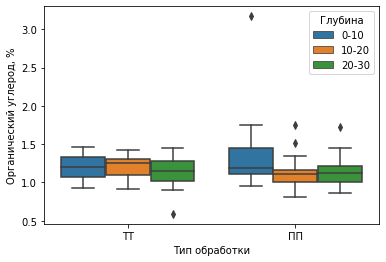

In [46]:
sns.boxplot( data = мои_данные , x = "Тип обработки", y = "Органический углерод, %", hue = 'Глубина')